In [2]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
from collections import Counter
from skimage import feature
import seaborn as sb
import pandas as pd
import numpy as np
import cv2

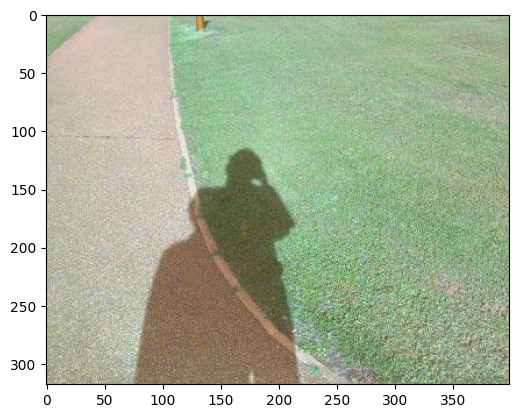

In [3]:
image = cv2.imread('../Images/image1.jpg')
plt.imshow(image)

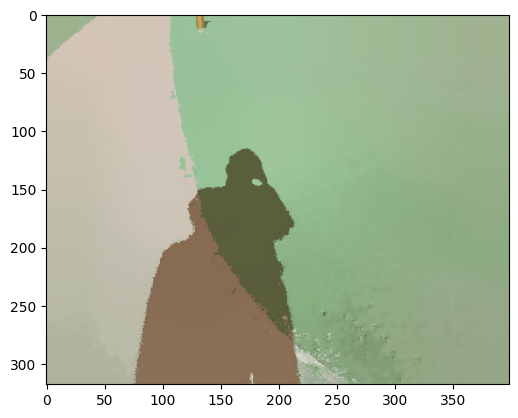

In [55]:
blurred_img = cv2.GaussianBlur(image,(7,7),2)
plt.imshow(blurred_img)

pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)

labels = cv2.pyrMeanShiftFiltering(image, 35, 25, termcrit=criteria)
plt.imshow(labels)

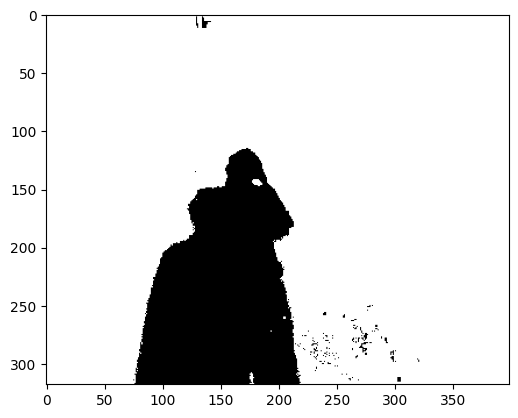

In [78]:
img_gray = cv2.cvtColor(labels,cv2.COLOR_RGB2GRAY)

th , img_gray_thrsh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
img_gray_thrsh = cv2.bitwise_not(img_gray_thrsh)
plt.imshow(img_gray_thrsh,cmap='Greys')

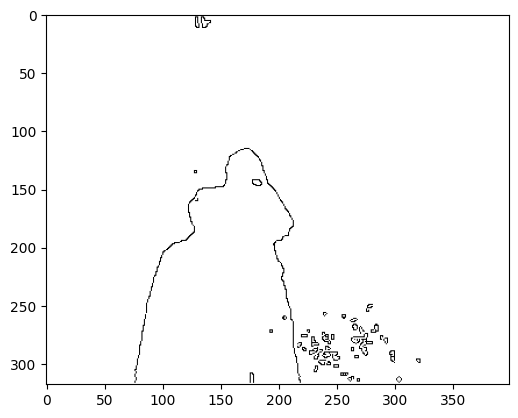

In [83]:
from skimage import feature
edged_img = feature.canny(img_gray_thrsh)
plt.imshow(edged_img,cmap='Greys')

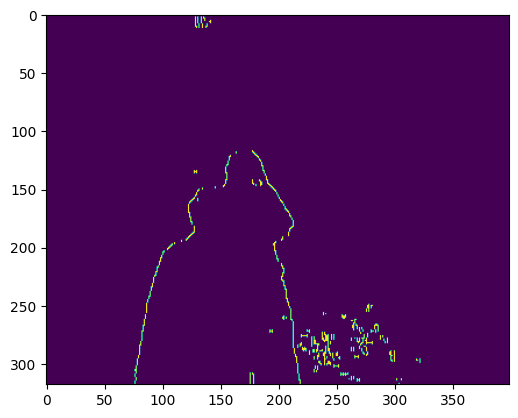

In [97]:
plt.imshow(cv2.GaussianBlur(np.uint8(edged_img),(1,5),0))